# <center>UAS (Pagi) : Data Warehouse dan Data Mining</center>

- NIM : 2019230088
- Nama : Daniel Morantha

---

# <u>Soal :</u>
## <font color=red>Berikut Program membangun model regresi (prediksi pembayaran premi asuransi), koreksi dan lengkapi jika ada yang perlu diperbaiki, simpan hasil/model-nya dan gunakan untuk membangun aplikasi web  dengan framework Flask ke server heroku !</font>

---

In [69]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Loading Dataset

In [70]:
data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [72]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [73]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Data Preparation - Mengubah data categorical ke numeric

In [74]:
data['sex'].unique()

array(['female', 'male'], dtype=object)

In [75]:
data['sex'] = data['sex'].map({'female':0,'male':1})
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [76]:
data['smoker'] = data['smoker'].map({'yes':1,'no':0})
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [77]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [78]:
data['region'] = data['region'].map({'southwest':1,'southeast':2, 'northwest':3, 'northeast':4})

In [79]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


In [80]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

### Memisah Feature dan Label

In [81]:
X = data.drop(['charges'],axis=1)

In [82]:
y = data['charges']

### Membangun Model

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [84]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

In [85]:
y_train

560      9193.83850
1285     8534.67180
1142    27117.99378
969      8596.82780
486     12475.35130
           ...     
1095     4561.18850
1130     8582.30230
1294    11931.12525
860     46113.51100
1126    10214.63600
Name: charges, Length: 1070, dtype: float64

### Model Training

In [86]:
lr = LinearRegression()
lr.fit(X_train,y_train)
svm = SVR()
svm.fit(X_train,y_train)
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
gr = GradientBoostingRegressor()
gr.fit(X_train,y_train)

GradientBoostingRegressor()

In [87]:
y_pred1 = lr.predict(X_test) #Prediksi LinearRegression
y_pred2 = svm.predict(X_test) # Prediksi Support Vector Machine
y_pred3 = rf.predict(X_test) # Prediksi RandomForestRegressor
y_pred4 = gr.predict(X_test) # Prediksi GradientBoostingRegressor

df1 = pd.DataFrame({'Actual':y_test, 'Lr':y_pred1, 'svm':y_pred2, 'rf':y_pred3, 'gr':y_pred4})

In [88]:
df1

,Actual,Lr,svm,rf,gr
764,9095.06825,8924.407244,9548.261584,11026.530485,11001.128629
887,5272.17580,7116.295018,9492.515425,5223.906763,5840.174656
890,29330.98315,36909.013521,9648.758701,28258.613351,28001.980112
1293,9301.89355,9507.874691,9555.044136,9987.465058,9745.291602
259,33750.29180,27013.350008,9420.421978,34607.559496,33639.100981
...,...,...,...,...,...
109,47055.53210,39116.968669,9648.902852,46849.992526,45431.423211
575,12222.89830,11814.555568,9625.431547,12410.453915,12465.025294
535,6067.12675,7638.107736,9504.168517,6395.959483,6974.336525
543,63770.42801,40959.081722,9605.004594,46832.085903,47862.047791


In [89]:
import matplotlib.pyplot as plt

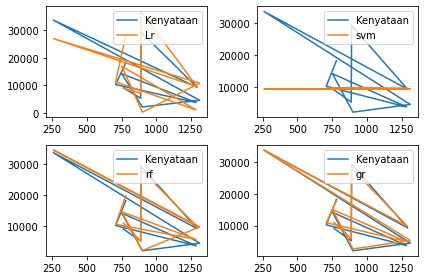

In [90]:
#Prediksi LinearRegression
plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:11], label = 'Kenyataan')
plt.plot(df1['Lr'].iloc[0:11], label="Lr")
plt.legend()


# Prediksi Support Vector Machine
plt.subplot(222)
plt.plot(df1['Actual'].iloc[0:11], label = 'Kenyataan')
plt.plot(df1['svm'].iloc[0:11], label="svm")
plt.legend()


# Prediksi RandomForestRegressor
plt.subplot(223)
plt.plot(df1['Actual'].iloc[0:11], label = 'Kenyataan')
plt.plot(df1['rf'].iloc[0:11], label="rf")
plt.legend()


# Prediksi GradientBoostingRegressor
plt.subplot(224)
plt.plot(df1['Actual'].iloc[0:11], label = 'Kenyataan')
plt.plot(df1['gr'].iloc[0:11], label="gr")
plt.legend()

plt.tight_layout()

plt.legend()

### Evaluasi

In [91]:
from sklearn import metrics

In [92]:
Skor1 = metrics.r2_score(y_test,y_pred1)
Skor2 = metrics.r2_score(y_test,y_pred2)
Skor3 = metrics.r2_score(y_test,y_pred3)
Skor4 = metrics.r2_score(y_test,y_pred4)

In [93]:
print('LinearRegression Skor : ',Skor1)
print('Support Vector Machine Skor : ' ,Skor2)
print('RandomForestRegressor Skor : ' ,Skor3)
print('GradientBoostingRegressor Skor : ' ,Skor4)

LinearRegression Skor :  0.7833463107364538
Support Vector Machine Skor :  -0.07229762787861826
RandomForestRegressor Skor :  0.8627820951113311
GradientBoostingRegressor Skor :  0.8779936181637191


In [94]:
MAE1 = metrics.mean_absolute_error(y_test,y_pred1)
MAE2 = metrics.mean_absolute_error(y_test,y_pred2)
MAE3 = metrics.mean_absolute_error(y_test,y_pred3)
MAE4 = metrics.mean_absolute_error(y_test,y_pred4)

In [95]:
print('LinearRegression MAE : ',MAE1)
print('Support Vector Machine MAE : ' ,MAE2)
print('RandomForestRegressor MAE : ' ,MAE3)
print('GradientBoostingRegressor MAE : ' ,MAE4)

LinearRegression MAE :  4186.5088983664355
Support Vector Machine MAE :  8592.428727899724
RandomForestRegressor MAE :  2468.592237940081
GradientBoostingRegressor MAE :  2447.167158715136


Sehingga ditemukan **model GradientBoostingRegressor** cocok untuk memprediksi dataset insurance.csv

### Prediksi Charges untuk pengguna baru

In [96]:
data = {'age':27,
        'sex':1,
        'bmi':30,
        'childern':5,
        'smoker':0,
        'region':2
       }

df = pd.DataFrame(data,index=[0])
df

,age,sex,bmi,childern,smoker,region
0,27,1,30,5,0,2


In [97]:
charge_pred = gr.predict(df)
print("Prediksi Pembayaran premi :", charge_pred)

Prediksi Pembayaran premi : [6569.49143272]


### Membangun Model

In [98]:
model_uas = GradientBoostingRegressor()
model_uas.fit(X,y)

GradientBoostingRegressor()

### Menyimpan Model untuk Deployment

Install pickle jika belum ada

  !pip install pickle-mixin

In [99]:
import pickle

pickle.dump(model_uas,open('model_uas.pkl','wb'))

Cek file model_uas.pkl, dan gunakan sebagai model saat membangun aplikasi web berbasis Flask

---
### Clue 
Untuk membangun model ini ke aplikasi web Flask server heroku :
- Model terdiri dari 5 atribut input dan 1 output : 

  INPUT :
  - 'age', umur
  - 'sex',  jenis kelamin
  - 'bmi',  berat
  - 'children',  jumlah anak
  - 'smoker',  perokok atau tidak
  
  OUTPUT
  - charges, besar iuran asuransi per bulan
  